In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
url= '/Users/amirrezakamkar/Desktop/Works_in_progress/Ironhack/3_3rd_week/Project/first_project/data/clean/merged_clean_owen2.csv'
df= pd.read_csv(url)

In [25]:
#finding the average price to divide the dataset into two groups, higher than average and lower than average.
print('the average price is' ,df.price_USD.mean())

# taking the average as the threshold and comparing the review_score average of the two groups.
threshold = 17.5
df_expensive = df[df['price_USD'] > threshold]
print("the average review score of more expensive games is ", df_expensive.review_score.mean())

threshold = 17
df_expensive = df[df['price_USD'] < threshold]
print("the average review score of cheaper games is ", df_expensive.review_score.mean())

# using median to divide the dataset into two groups. in this case median is a better choice than mean as the very high and very low amounts
#doesn't change it considerably.
print('the median review score is ', df.review_score.median())

# taking the median as the threshold and comparing the revenue average for the two groups.
review_threshold = 83
df_high_review = df[df['review_score'] > review_threshold]
print('the average revenue of games with higher than median review score is ', df_high_review.revenue.mean())

review_threshold = 83
df_high_review = df[df['review_score'] < review_threshold]
print('the average revenue of games with lower than median review score is ', df_high_review.revenue.mean())

the average price is 17.53978835978836
the average review score of more expensive games is  75.43358778625954
the average review score of cheaper games is  76.78296382730456
the median review score is  83.0
the average revenue of games with higher than median review score is  3322278.694698058
the average revenue of games with lower than median review score is  2017180.305640433


In [27]:
# Calculating the average revenue per genre
genres = ['Sports', 'Racing', 'Simulation', 'Action', 'Adventure', 'RPG']
genre_revenue_data = []
# Loop through each genre column
for genre in genres:
    # As the genre is boolean value, filter games where the genre is True
    genre_games = df[df[genre] == True]
    
    # Calculate the average revenue for the games in the genres
    avg_revenue = genre_games['revenue'].mean()
    
    # Count the number of games in the genres
    num_games = genre_games.shape[0]
    
    # Append the result to the list
    genre_revenue_data.append({'genre': genre, 'num_games': num_games, 'avg_revenue': avg_revenue})

# Convert the list to a DataFrame for easier plotting
genre_revenue_df = pd.DataFrame(genre_revenue_data)

# Display the resulting DataFrame
display(genre_revenue_df)


,genre,num_games,avg_revenue
0,Sports,46,1.131611e+06
1,Racing,31,1.146141e+06
2,Simulation,539,1.538958e+06
3,Action,568,5.708596e+06
4,Adventure,685,3.855070e+06
5,RPG,535,4.300139e+06


/var/folders/kh/bjfqwck131971mz369pxctvm0000gn/T/ipykernel_1250/3129498851.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_revenue_df,


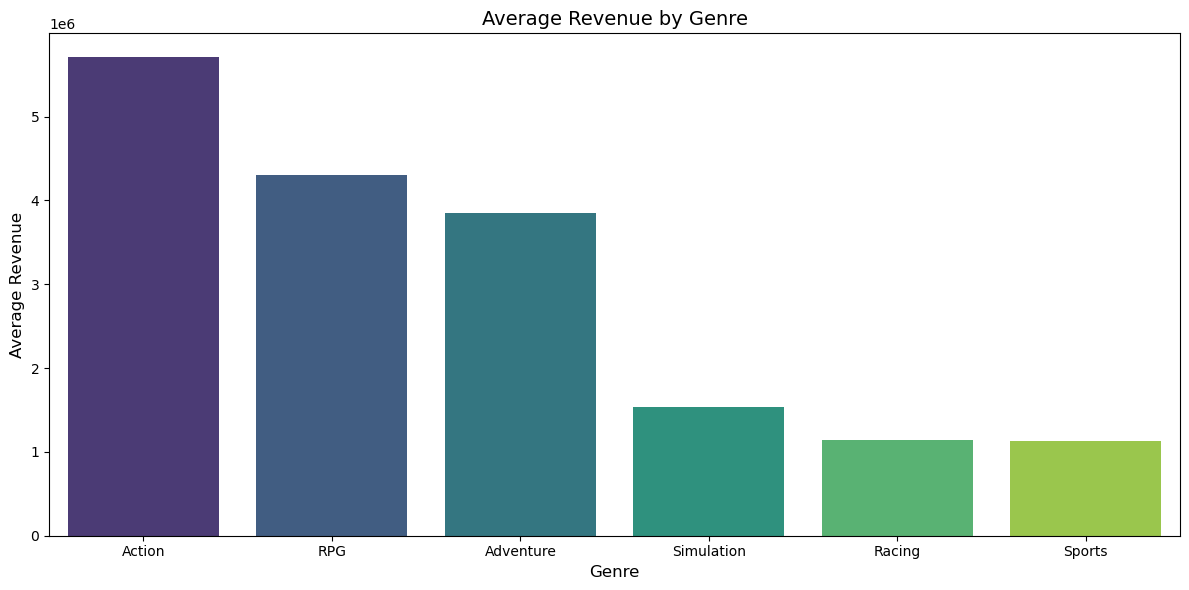

In [35]:
# Creating a bar chart based on the genre_revenue_df

# Sorting the dataframe in descending order
 
genre_revenue_df = genre_revenue_df.sort_values(by='avg_revenue', ascending=False)

# Set up the plot
plt.figure(figsize=(12, 6))

# Plot using seaborn
sns.barplot(data=genre_revenue_df, 
            x='genre', 
            y='avg_revenue', 
            palette='viridis')

# Add title and labels
plt.title('Average Revenue by Genre', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Average Revenue', fontsize=12)

# Show the plot
plt.tight_layout()
plt.savefig('average_revenue_by_genre.png', dpi=300)
plt.show()

In [37]:
# Finding the publishers with the highest revenue
average_revenue_per_publisher = df.groupby('publishers')['revenue'].mean()
top_publishers = average_revenue_per_publisher.sort_values(ascending=False).head(10)
display(top_publishers)

publishers
Game Science                       8.377934e+08
Pocketpair                         3.923286e+08
Newnight                           2.170179e+08
PlayStation Publishing LLC         1.272213e+08
NEXON                              1.022448e+08
Eleventh Hour Games                9.772367e+07
The Fun Pimps Entertainment LLC    8.978193e+07
Stunlock Studios                   8.361474e+07
Keen Games GmbH                    5.759552e+07
Supergiant Games                   4.271855e+07
Name: revenue, dtype: float64

/var/folders/kh/bjfqwck131971mz369pxctvm0000gn/T/ipykernel_1250/610372806.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


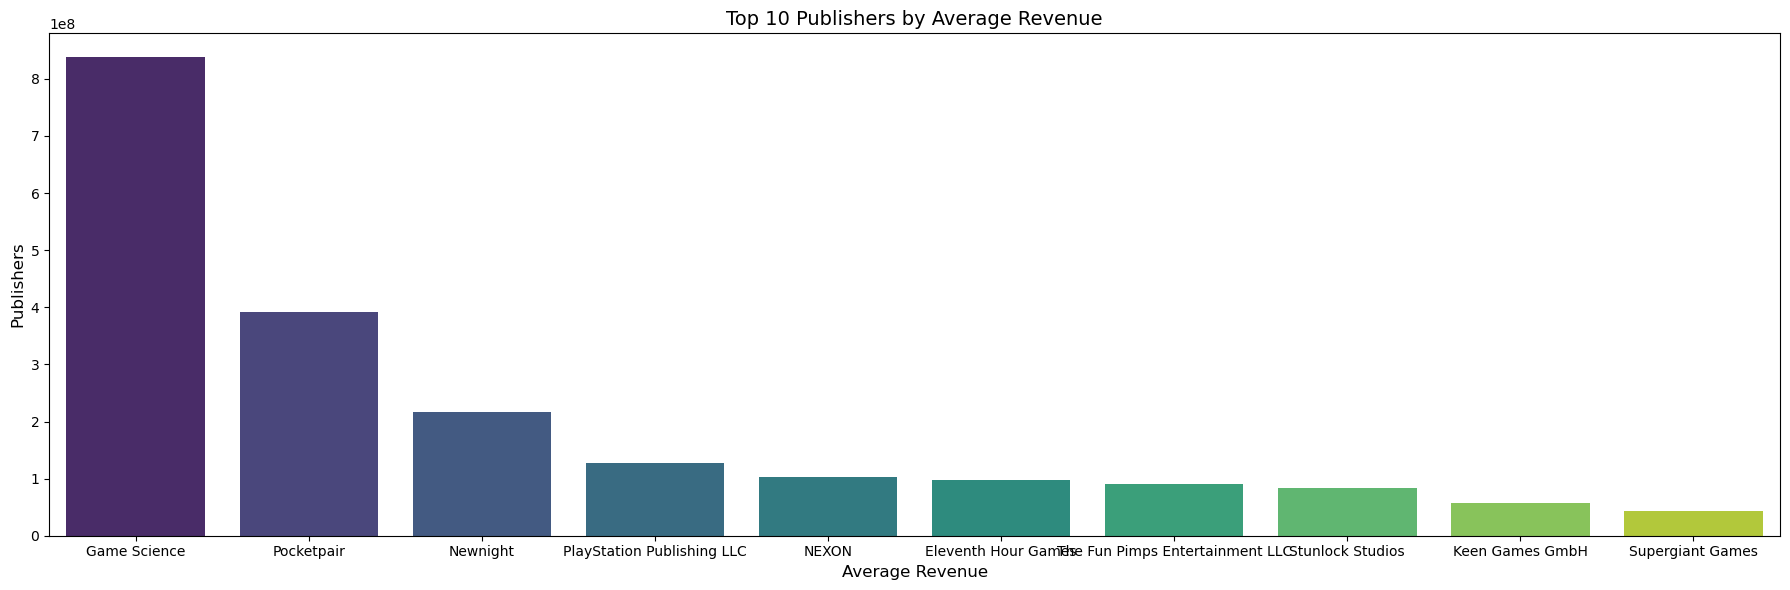

In [53]:
# Visualizeing the top 10 publishers by average revenue

# Set up the plot
plt.figure(figsize=(18, 6))

# Plot the bar chart
sns.barplot(
    x=top_publishers.index,               # Publisher names
    y=top_publishers.values,              # Average revenue 
    palette='viridis'                     # Color palette
)

# Add title and labels
plt.title('Top 10 Publishers by Average Revenue', fontsize=14)
plt.xlabel('Average Revenue', fontsize=12)
plt.ylabel('Publishers', fontsize=12)

# Display the plot
plt.tight_layout()
plt.savefig('top_10_publishers_by_average_revenue.png', dpi=300)
plt.show()


